The dataset used in this project comes from the UCI Machine learning Repository. This data was collected in 1978 and each of the 506 entrires represents aggreated information about 14 features of comes from varies suburbans located in Boston.

Attribute Information

Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:

1) PRICE: Median value of owner-occupied homes in $1000's [k$]

## Importing the dependencies 

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 


## loading the dataset to a pandas dataframe

In [19]:
house_price= pd.read_csv('/home/ubuntu/Desktop/Machine Learning Projects /My Machine Learning project/Boston House price XGbooster Regression/boston.csv')

## Exploratory Data Analysis

In [20]:
#print first rows 
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
house_price.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [22]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
#check the missing values
house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Statstical measures of the dataset

In [24]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation 

In [25]:
corr_house_price=house_price.corr()

In [26]:
corr_house_price

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
corr_house_price.shape

(14, 14)

<AxesSubplot:>

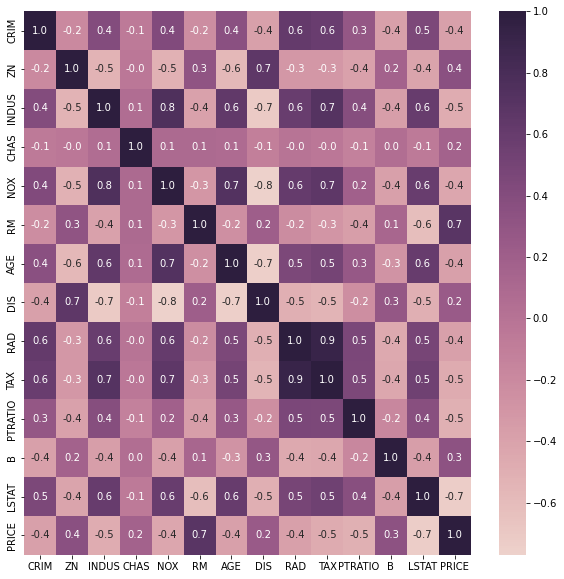

In [28]:
#understanding the correlation between various features in the dataset constructing a heatmap to understanding the correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr_house_price,annot=True, fmt=".1f",cmap=sns.cubehelix_palette(as_cmap=True))

## spliting the data and target 

In [29]:
X=house_price.drop(['PRICE'],axis=1)

In [30]:
Y=house_price['PRICE']

In [31]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [32]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


### spliting the data into training data and testing data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


## Model Training 

## XGBRegressor

In [35]:
#loading the model 
model=XGBRegressor()

In [36]:
#Training the model with X_train
model.fit(X_train,Y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Prediction & Model Evaluation

In [37]:
#accuracy for prediction on the training data
training_data_predict=model.predict(X_train)

In [38]:
print(training_data_predict)

[14.876002  19.662678  35.38007   11.998021  20.390879  23.706612
 21.056877  49.995255  27.457823  12.6294    17.396267  23.79792
 22.910114  18.55508   30.312103  31.195423  16.014763  23.31645
 15.006697  10.204298  12.5380125 19.61509   19.66136   19.49668
 15.00606   35.398483  13.506171  20.609844  24.682549  21.905018
 17.068335  23.6042    21.085814  15.601452  18.54477    8.306514
 14.520174  23.902676  11.800991  24.564783  24.801666  18.727734
 17.892405  48.79138   13.004631  29.595758  18.006918  20.08959
 17.288322  23.102274  22.6029    13.793123  43.816734  35.20019
 22.592157  17.42807   48.502285  31.503666  15.5974045 14.267436
 20.604322  22.033669  20.100742  17.582758  23.706852  14.12239
 19.792477  24.384455  33.405907  39.803566  34.905632  24.769258
 14.5926695 23.368898  33.820587  23.869007   9.64405   21.74419
 31.641304  14.484027   7.232553  24.102703  21.383333  17.198795
 46.000473  23.153412  14.497523  20.505415  17.008238  48.27686
 30.501759  20.618

In [39]:
# R square error 
score_r_square=metrics.r2_score(Y_train,training_data_predict)

In [40]:
print("R Squared Error : ", score_r_square)

R Squared Error :  0.9999932849235356


In [41]:
# mean absoluate error 
mean_abs_error=metrics.mean_absolute_error(Y_train,training_data_predict)

In [42]:
print("Mean Absoluate Error : ", mean_abs_error)

Mean Absoluate Error :  0.015959144818900775


In [43]:
 ## prediction on the tese data
test_data_predict=model.predict(X_test)

In [44]:
test_data_predict

array([42.74622  , 19.78573  , 20.579105 , 32.79266  , 23.147135 ,
       21.640793 , 13.5511465,  7.9866385, 19.791334 , 17.194458 ,
       16.244421 , 32.253292 , 34.19664  , 25.787457 ,  7.003338 ,
       11.719117 , 21.318201 , 16.468893 , 12.669956 , 22.104694 ,
       22.134321 , 47.07059  , 22.810692 , 24.072947 , 12.311422 ,
       27.259499 , 18.567297 , 21.642921 , 20.705463 , 21.544579 ,
       14.354657 , 33.281105 , 20.685549 , 17.342514 , 17.56727  ,
       13.245988 , 23.825132 , 34.77503  , 18.561607 , 23.183676 ,
       16.394434 , 10.197184 , 20.75447  , 15.200618 , 20.092638 ,
       26.54555  , 21.025711 , 20.036818 , 25.879812 , 20.611343 ,
       26.816973 , 23.094099 , 49.18955  , 19.1513   , 22.06002  ,
       20.94343  , 48.06382  , 15.387839 , 29.111969 , 20.225601 ,
       22.29728  , 20.20981  , 33.013508 , 28.561848 , 16.92323  ,
       25.429798 , 36.950607 , 24.72117  , 27.07721  , 26.60588  ,
       24.435978 , 24.591536 , 11.865473 , 32.709236 ,  9.4146

In [45]:
# R square error 
score_r_square=metrics.r2_score(Y_train,test_data_predict)

ValueError: Found input variables with inconsistent numbers of samples: [404, 102]

In [ ]:
score_r_square

In [ ]:
#Mean absoluate error
mean_abs_error=metrics.mean_absolute_error(X_train,training_data_predict)

In [ ]:
mean_abs_error

## visualizing the actual prices and predicted prices

In [ ]:
plt.scatter(Y_train,training_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual and Predicted Prices")
plt.show()